In [2]:
cd /media/DATA/Saarbrucken/EDA_Research/thesis_code/disent-vaes

/media/DATA/Saarbrucken/EDA_Research/thesis_code/disent-vaes


In [12]:
import PIL
from PIL import Image, ImageDraw
from IPython.display import display
import numpy as np
import json
import matplotlib.pyplot as plt

#from continum_dataloader import ContinumDataset
#from torch.utils.data import DataLoader
from tqdm import tqdm

%matplotlib inline

## Draw Ellipse or Rectangle

In [2]:
fill_color = (255, 255, 255)
outline_color = (0, 0, 0)
bg_color = (0, 0, 0)
W,H = 64, 64

save_path = "D:\\Saarbrucken\\EDA_Research\\thesis_code\\1dvaetestdata\\testdata\\"

#draw.ellipse((50, 50, 150, 150), fill=fill_color, outline=outline_color)

for i in range(1000):
    continue
    x_offset, y_offset = 4 * np.random.randn() + 1,  2 * np.random.randn() + 1
    #print(x_offset, y_offset)
    im = Image.new('RGB', (W, H), bg_color)
    draw = ImageDraw.Draw(im)
    rect_bounds = (W/4 + x_offset, W/4 + y_offset, W/2 + x_offset, W/2 + y_offset)
    
    what_to_gen = np.random.randint(low=0,high=2) # 0 = circle, 1 = square, high is exclusive
    
    draw.rectangle(ellipse_bounds if what_to_gen == 1 else rect_bounds, 
                   fill=fill_color, 
                   outline=outline_color)
    
    im.save(save_path + f'image{i}_{what_to_gen}.jpg')
    #display(im)


## Draw Rounded Rectangle, morphing into Circle

In [24]:
fill_color = 255
outline_color = 0
bg_color = 0
W,H = 64, 64

save_path = "D:\\Saarbrucken\\EDA_Research\\thesis_code\\datasets\\OneDimContinumData\\"

for i in tqdm(range(20000)):

    im = Image.new('L', (W, H), bg_color)
    draw = ImageDraw.Draw(im)
    x_offset, y_offset = 0, 0
    rect_bounds = (W / 4 + x_offset,
                   W / 4 + y_offset,
                   W / (4/3) + x_offset,
                   W / (4/3) + y_offset)
    #rnd_radius = np.random.randint(low=0, high=9)
    rnd_radius = np.random.choice(range(1,20,4))
    draw.rounded_rectangle(rect_bounds,
               radius=rnd_radius,
               fill=fill_color, 
               outline=outline_color)
    #display(im)
    im.save(save_path + f'image_{i}_{rnd_radius}.jpg')

## Three shapes: Triangle, Rectanle, Circle

  0%|          | 0/20 [00:00<?, ?it/s]

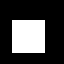

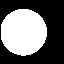

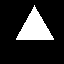

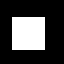

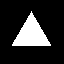

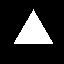

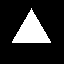

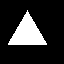

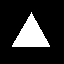

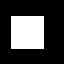

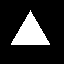

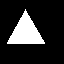

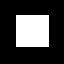

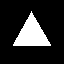

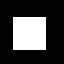

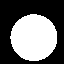

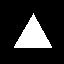

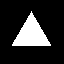

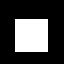

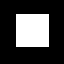

100%|██████████| 20/20 [00:00<00:00, 480.60it/s]


In [11]:
fill_color = 255
outline_color = 0
bg_color = 0
W,H = 64, 64

add_noise = True

save_path = "/media/DATA/Saarbrucken/EDA_Research/thesis_code/datasets/ThreeShapesData/"

# defines the bounding circle inside which our polygons are drawn
circle_radius = 24
circle_center = (W/2,H/2)
bounding_circle = (circle_center, circle_radius)

n_sides = { 'triangle': 3,
            'square': 4,
            'circle': 500
          }

for i in tqdm(range(20)):
    
    im = Image.new('L', (W, H), bg_color)
    draw = ImageDraw.Draw(im)

    chosen_shape = np.random.choice(list(n_sides.keys()))

    if add_noise:
        
        # add N(2,1)
        noise_mu, noise_s = 3, 1
        x_offset = noise_mu * np.random.randn() + noise_s  
        y_offset = noise_mu * np.random.randn() + noise_s
        
        circle_center = (W/2 + x_offset, H/2 + y_offset)
        
        bounding_circle = (circle_center, circle_radius)

        
    draw.regular_polygon( bounding_circle, n_sides[chosen_shape], 
                         rotation=0,
                         fill=fill_color, 
                         outline=outline_color)

    display(im)
    #im.save(save_path + f'image_{i}_{chosen_shape}.jpg')


In [7]:
(10/2 + np.random.randn(),10/2 + np.random.randn())

(4.632802053765503, 6.277814959271515)